
<div class="jumbotron">
  <h1><i class="fa fa-bar-chart" aria-hidden="true"></i> Modelado de datos</h1>
  <p></p>
</div>

In [22]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.style.use('fivethirtyeight')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


In [21]:


# Modelado y Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
#from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import time_series_spliter
from skforecast.model_selection import cv_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection import backtesting_forecaster_intervals



### Cargar datos

In [4]:
# Load data (deserialize)
with open('../Data/data_engi_v1.pickle', 'rb') as handle:
    df = load(handle)

In [5]:
df = pd.DataFrame(df['Num_vehiculos_hora'])

In [6]:
df

Num_vehiculos_hora
Fecha                                  
2021-03-01 00:00:00                1871
2021-03-01 01:00:00                 794
2021-03-01 02:00:00                 478
2021-03-01 03:00:00                 377
2021-03-01 04:00:00                 639
...                                 ...
2021-08-31 19:00:00                4348
2021-08-31 20:00:00                3628
2021-08-31 21:00:00                2322
2021-08-31 22:00:00                1624
2021-08-31 23:00:00                1454

[4413 rows x 1 columns]

### Eliminar variables superfluas

In [7]:
# No aplica

## Label

In [8]:
target = 'Num_vehiculos_hora'

## Features

In [9]:
# No aplica

## Scaler

In [10]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(X)
#X = scaler.transform(X)

#No aplica

# Modelo autoregresivo recursivo





Se crea y entrena un modelo autorregresivo recursivo (ForecasterAutoreg) a partir de un modelo de regresión lineal con penalización Ridge y una ventana temporal de 24 lags. Esto último significa que, para cada predicción, se utilizan como predictores la demanda de las 24 horas anteriores

In [11]:
fin_train = '2021-06-30 23:00:00'
fin_train = datetime.strptime(fin_train, '%Y-%m-%d %H:%M:%S')

In [12]:
df[df.index <= fin_train]

Num_vehiculos_hora
Fecha                                  
2021-03-01 00:00:00                1871
2021-03-01 01:00:00                 794
2021-03-01 02:00:00                 478
2021-03-01 03:00:00                 377
2021-03-01 04:00:00                 639
...                                 ...
2021-06-30 19:00:00                3980
2021-06-30 20:00:00                2863
2021-06-30 21:00:00                1863
2021-06-30 22:00:00                1213
2021-06-30 23:00:00                1080

[2925 rows x 1 columns]

In [13]:
# Separación datos train-val-test
# ==============================================================================

fin_train = '2021-07-15 23:00:59'
fin_validacion = '2021-08-15 23:00:59'
datos_train = df.loc[: fin_train, :]
datos_val   = df.loc[fin_train:fin_validacion, :]
datos_test  = df.loc[fin_validacion:, :]

print(f"Fechas train      : {datos_train.index.min()} --- {datos_train.index.max()}")
print(f"Fechas validacion : {datos_val.index.min()} --- {datos_val.index.max()}")
print(f"Fechas test       : {datos_test.index.min()} --- {datos_test.index.max()}")



Fechas train      : 2021-03-01 00:00:00 --- 2021-07-15 23:00:00
Fechas validacion : 2021-07-16 00:00:00 --- 2021-08-15 23:00:00
Fechas test       : 2021-08-16 00:00:00 --- 2021-08-31 23:00:00


In [14]:
datos_train.size

3285

In [15]:
datos_val.size

744

In [16]:
datos_test.size

384

### Definir los parámetros de búsqueda

In [17]:
# Grid search de hiperparámetros
# ==============================================================================


# Hiperparámetros del regresor
param_grid = [ np.logspace(-3, 3, 10)]

# Lags utilizados como predictores
lags_grid = [12,24,36,48,60,72,84,96]


In [18]:
lags_grid
param_grid[0]

array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])

alpha:  0.001
lag:  12
Number of observations used for training: 4029
Number of observations used for testing: 384
    Number of folds: 16
    Number of steps per fold: 24
Error backtest: [1626.29759908]
alpha:  0.001
lag:  24
Number of observations used for training: 4029
Number of observations used for testing: 384
    Number of folds: 16
    Number of steps per fold: 24
Error backtest: [1051.43985937]
alpha:  0.001
lag:  36
Number of observations used for training: 4029
Number of observations used for testing: 384
    Number of folds: 16
    Number of steps per fold: 24
Error backtest: [1015.10164163]
alpha:  0.001
lag:  48
Number of observations used for training: 4029
Number of observations used for testing: 384
    Number of folds: 16
    Number of steps per fold: 24
Error backtest: [1018.32162072]
alpha:  0.001
lag:  60
Number of observations used for training: 4029
Number of observations used for testing: 384
    Number of folds: 16
    Number of steps per fold: 24
Error backte

alpha:  0.46415888336127775
lag:  72
Number of observations used for training: 4029
Number of observations used for testing: 384
    Number of folds: 16
    Number of steps per fold: 24
Error backtest: [991.0109563]
alpha:  0.46415888336127775
lag:  84
Number of observations used for training: 4029
Number of observations used for testing: 384
    Number of folds: 16
    Number of steps per fold: 24
Error backtest: [988.82762078]
alpha:  0.46415888336127775
lag:  96
Number of observations used for training: 4029
Number of observations used for testing: 384
    Number of folds: 16
    Number of steps per fold: 24
Error backtest: [968.092194]

Averages::::::::::::::::::::::::::::::::::::::::::::::::::::::::::. 
Best::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::. 






alpha:  2.154434690031882
lag:  12
Number of observations used for training: 4029
Number of observations used for testing: 384
    Number of folds: 16
    Number of steps per fold: 24
Error backtest: [1626.2

alpha:  1000.0
lag:  24
Number of observations used for training: 4029
Number of observations used for testing: 384
    Number of folds: 16
    Number of steps per fold: 24
Error backtest: [1051.43985937]
alpha:  1000.0
lag:  36
Number of observations used for training: 4029
Number of observations used for testing: 384
    Number of folds: 16
    Number of steps per fold: 24
Error backtest: [1015.10164163]
alpha:  1000.0
lag:  48
Number of observations used for training: 4029
Number of observations used for testing: 384
    Number of folds: 16
    Number of steps per fold: 24
Error backtest: [1018.32162072]
alpha:  1000.0
lag:  60
Number of observations used for training: 4029
Number of observations used for testing: 384
    Number of folds: 16
    Number of steps per fold: 24
Error backtest: [1005.69177132]
alpha:  1000.0
lag:  72
Number of observations used for training: 4029
Number of observations used for testing: 384
    Number of folds: 16
    Number of steps per fold: 24
Error b

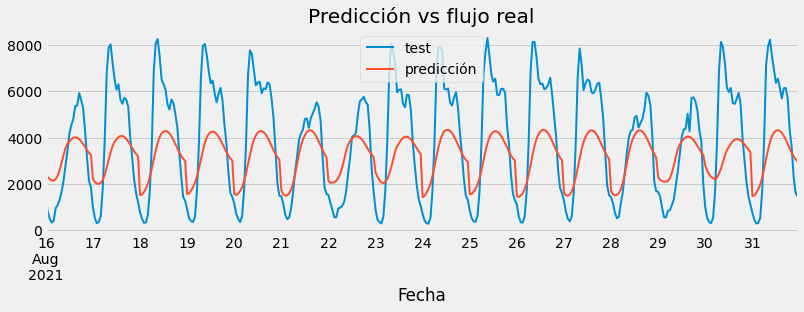

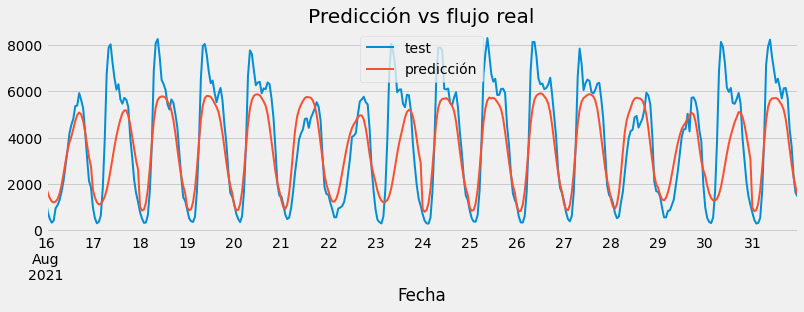

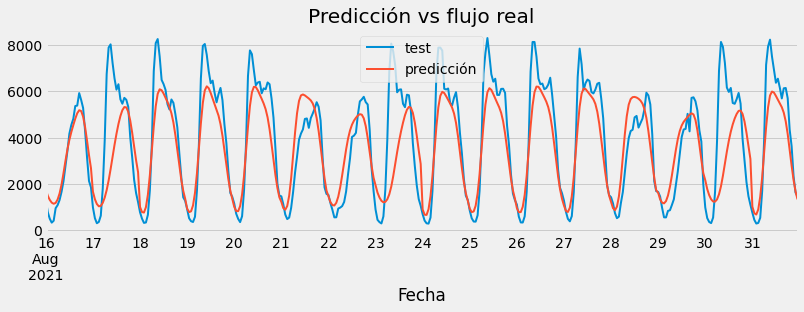

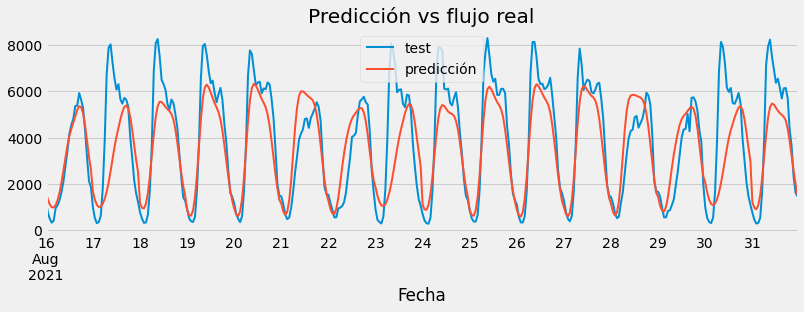

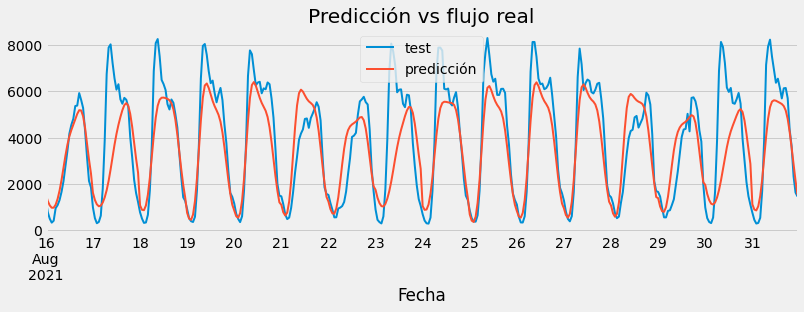

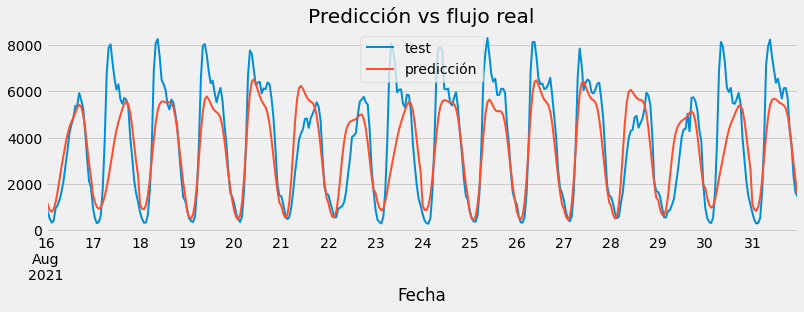

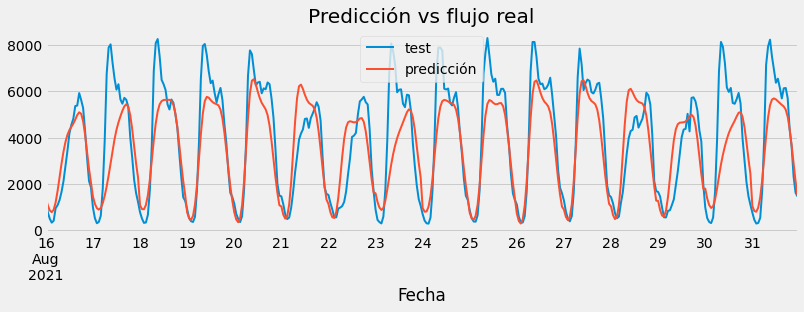

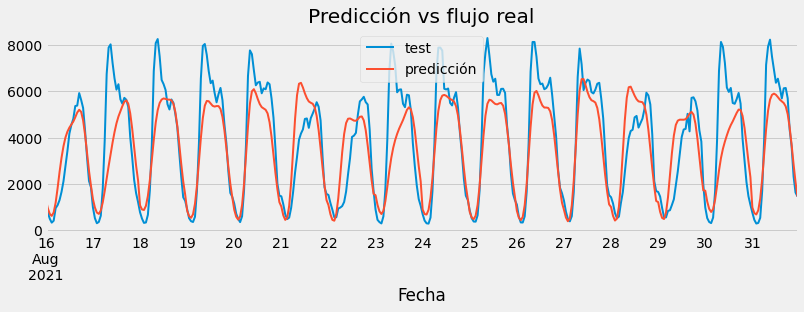

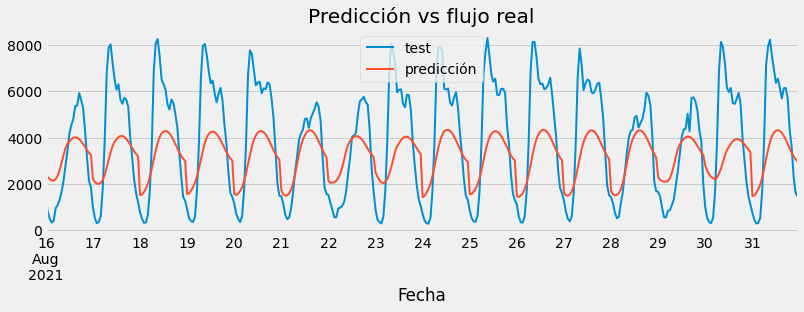

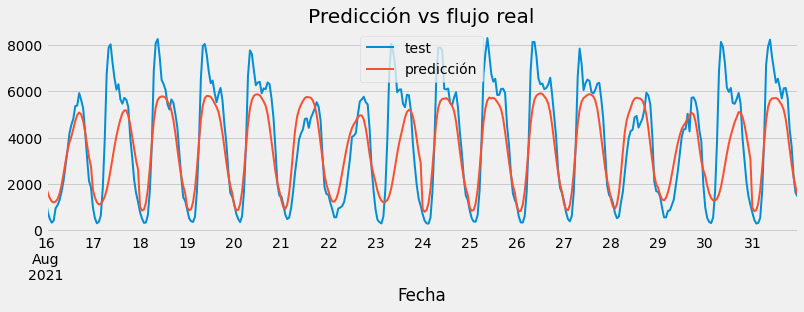

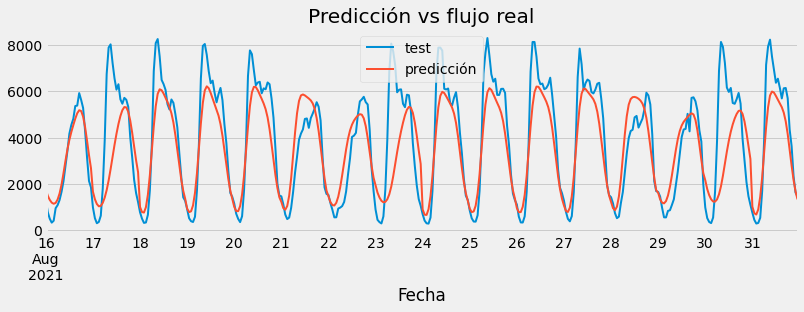

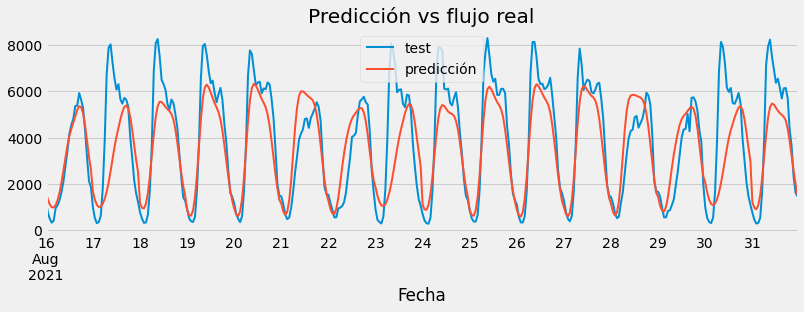

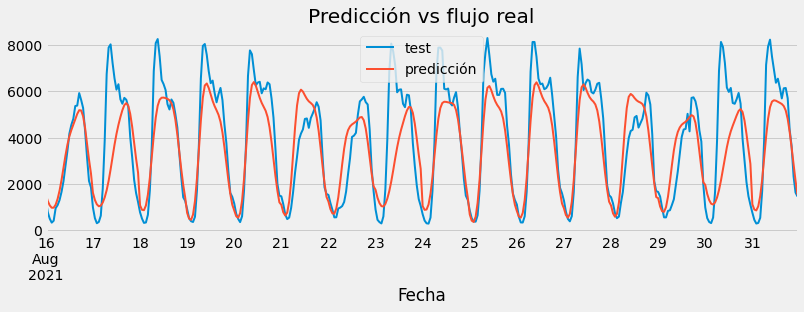

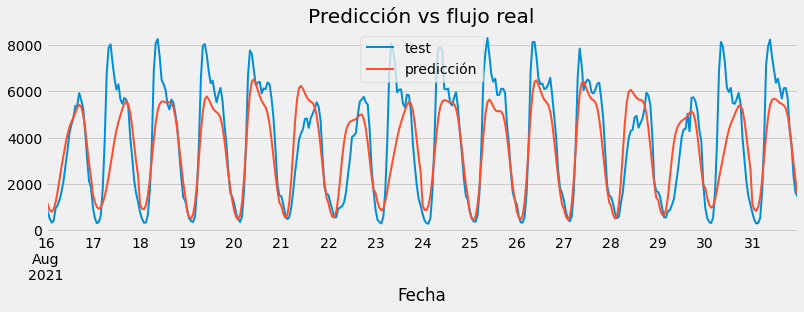

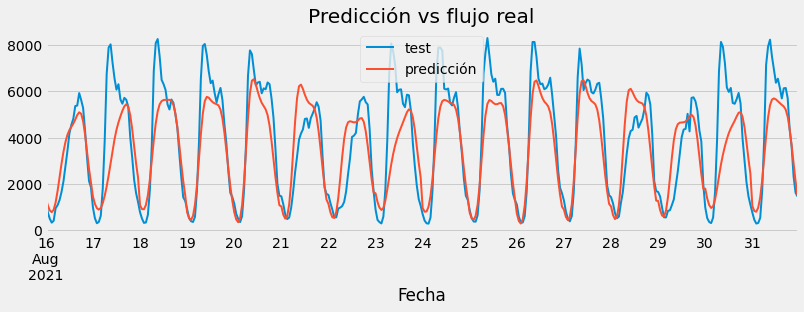

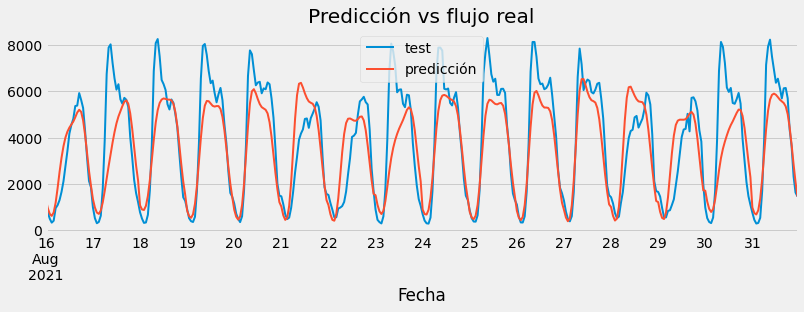

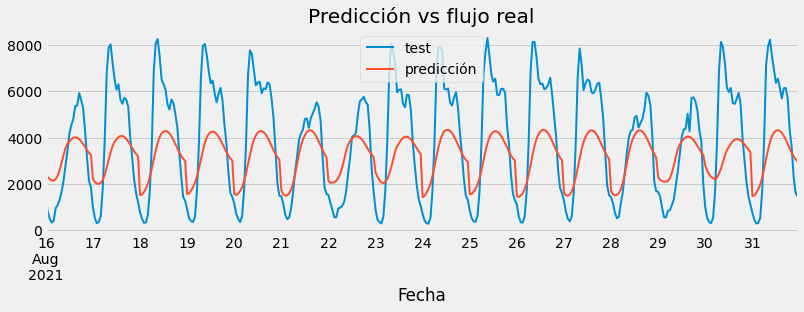

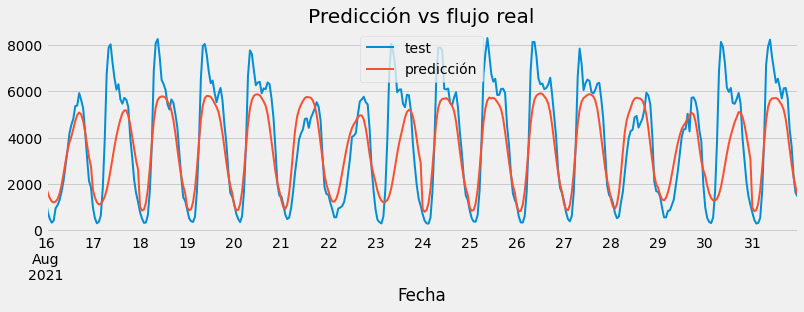

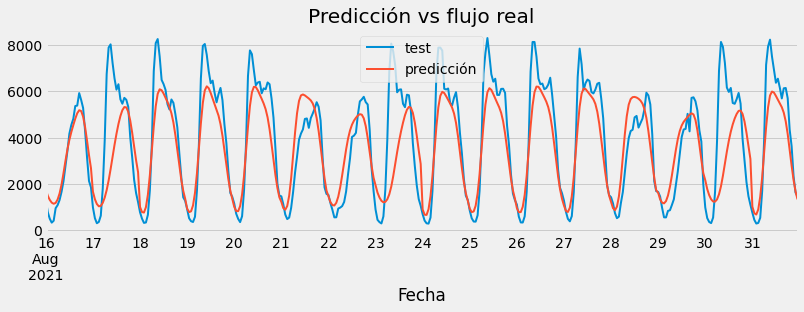

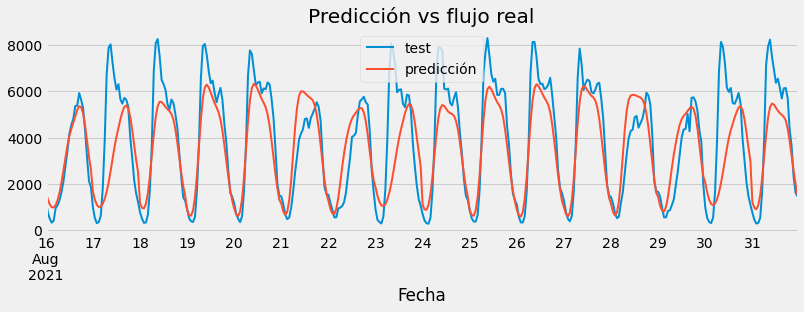

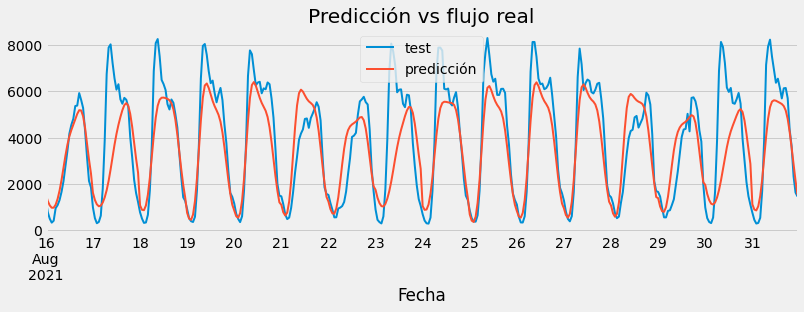

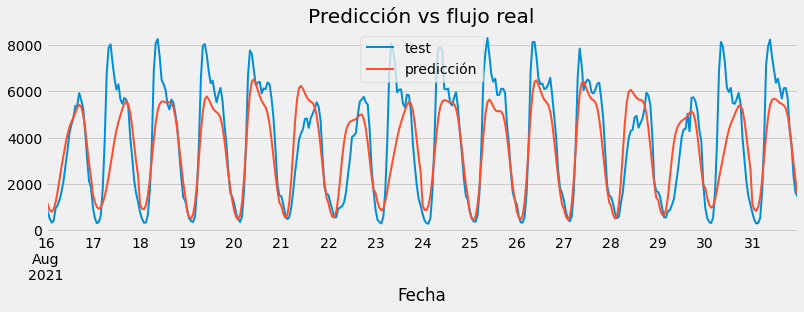

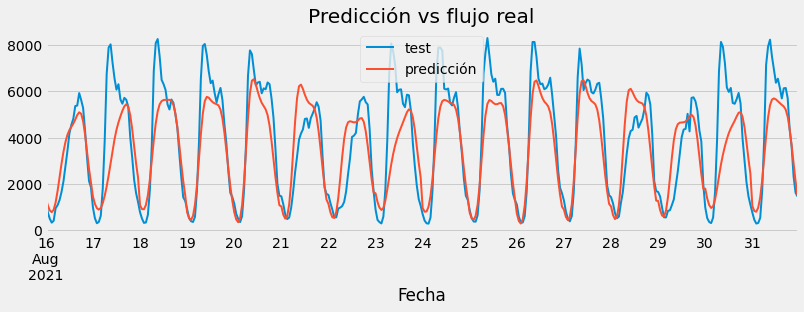

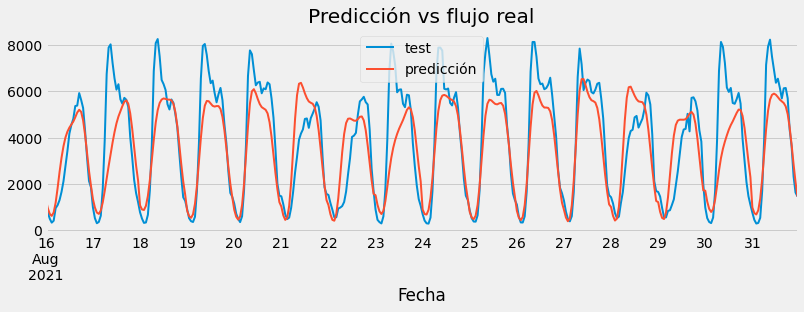

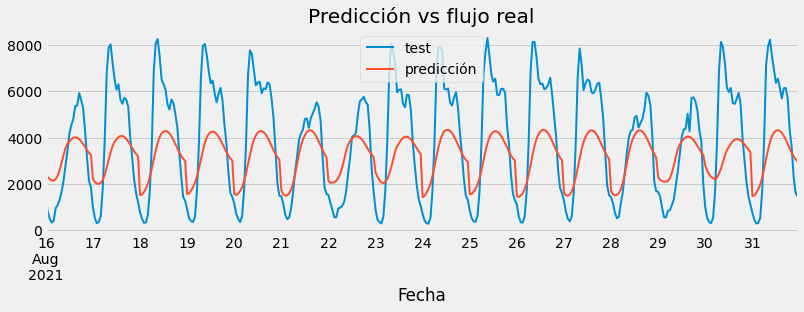

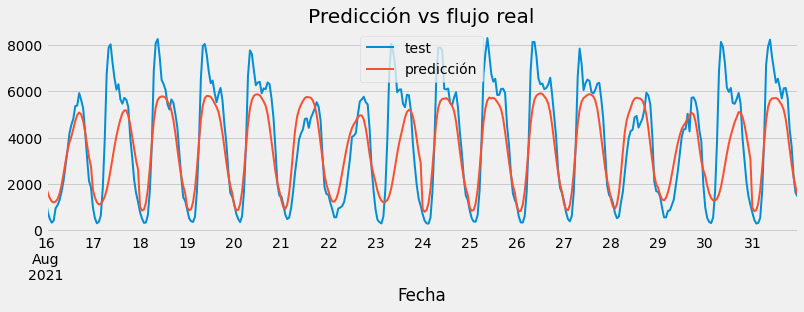

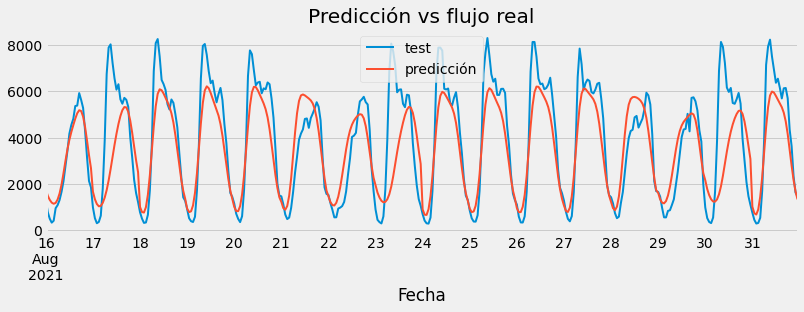

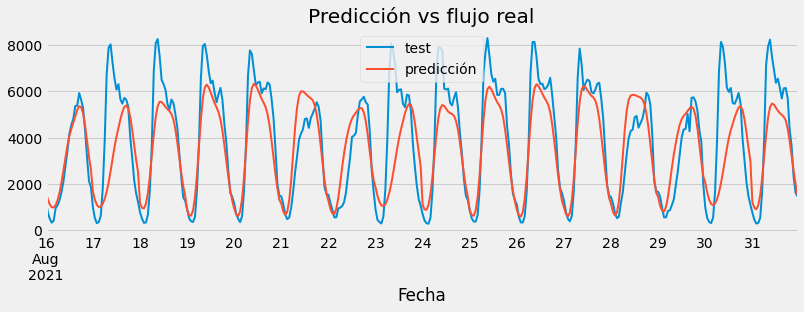

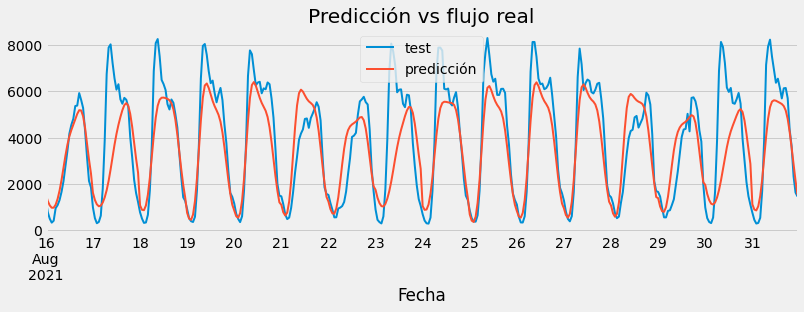

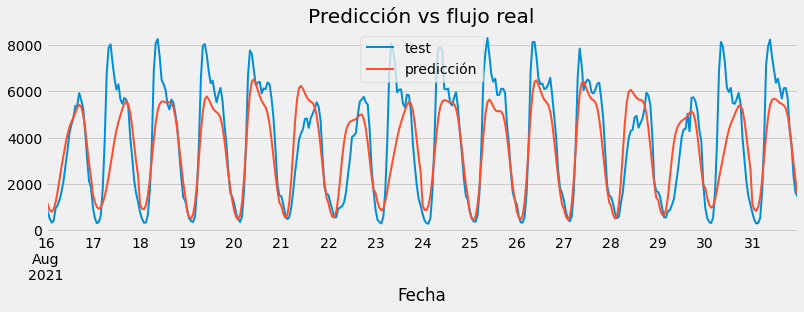

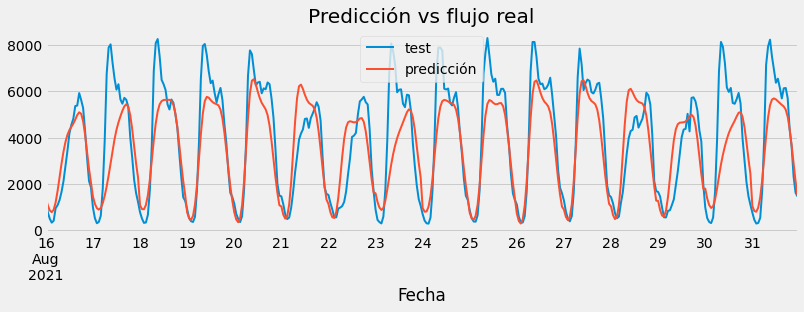

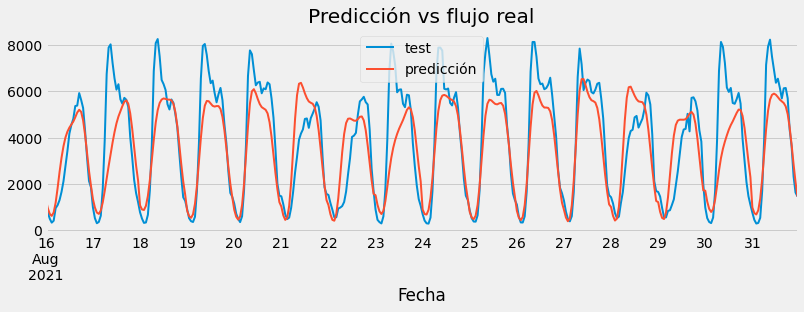

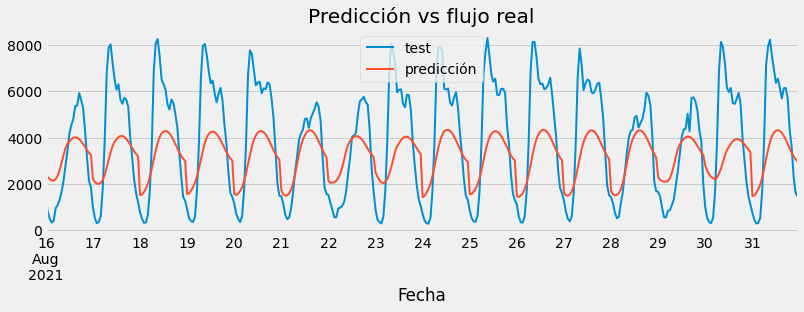

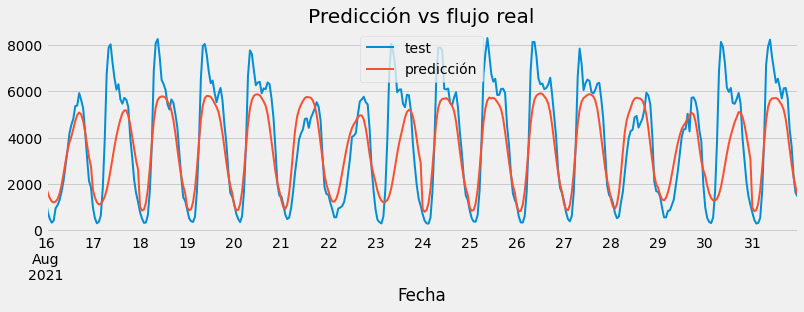

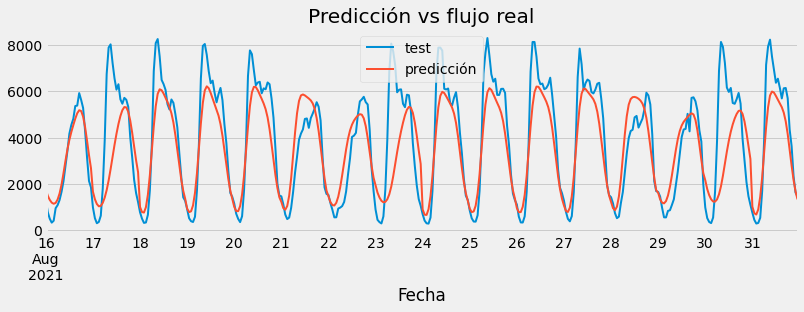

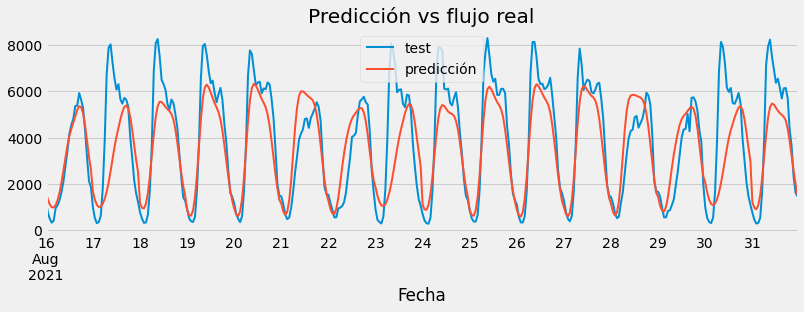

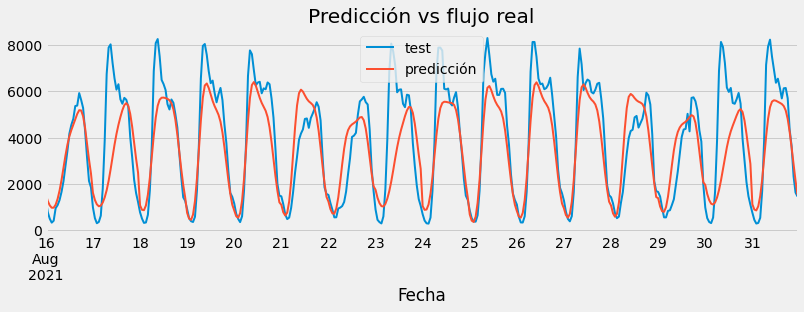

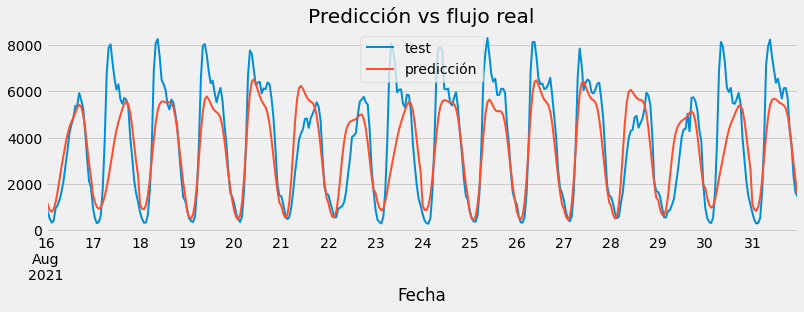

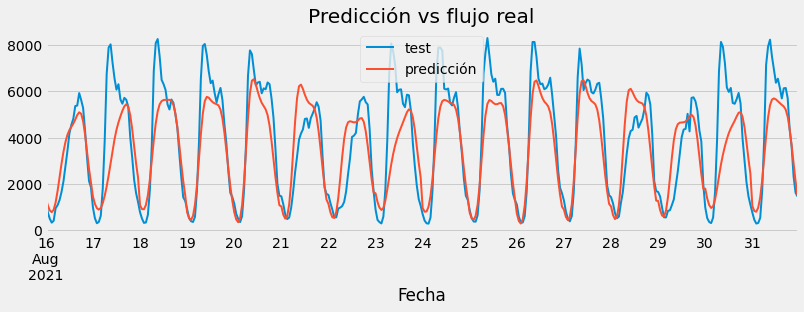

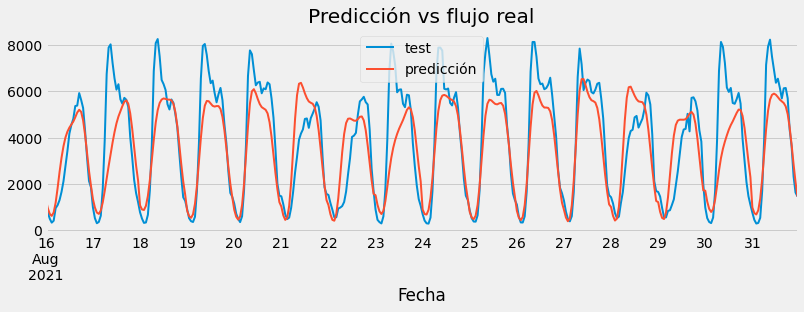

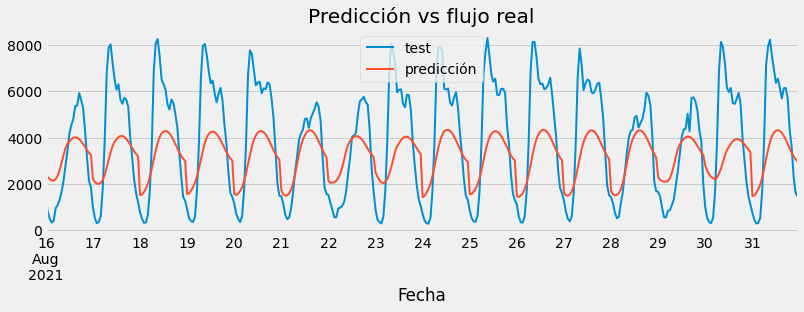

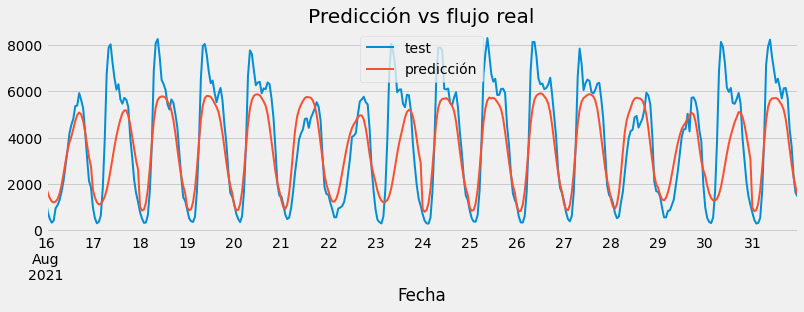

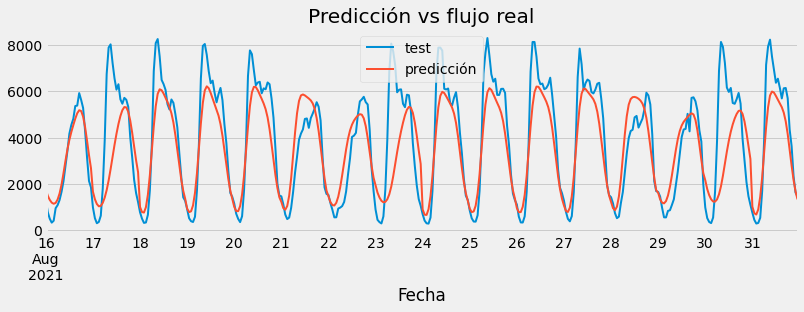

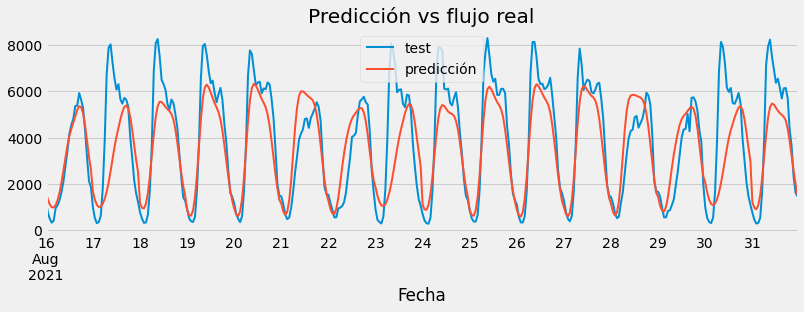

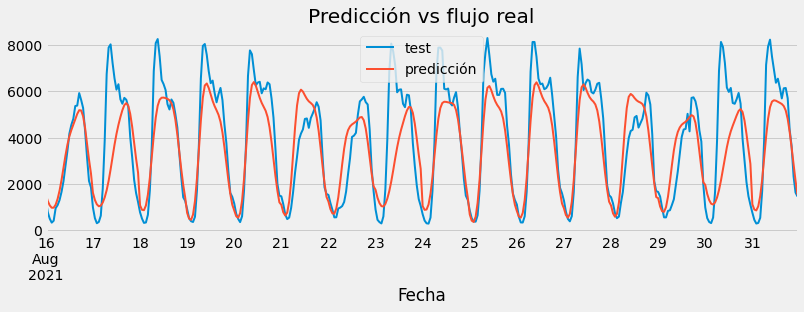

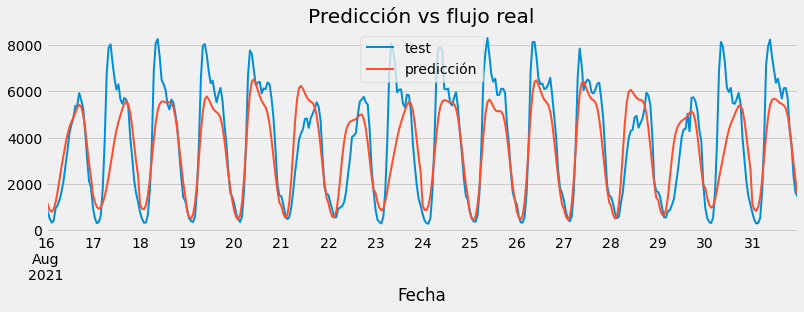

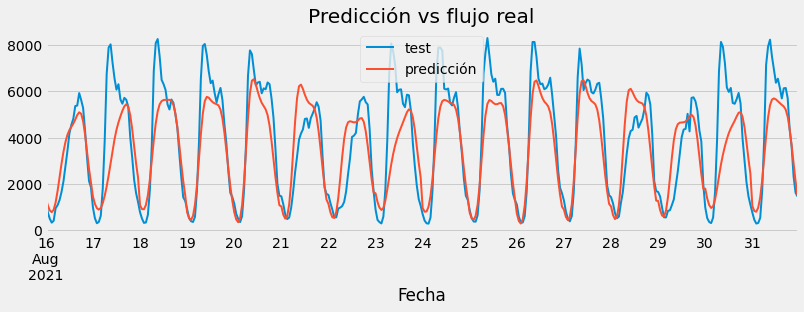

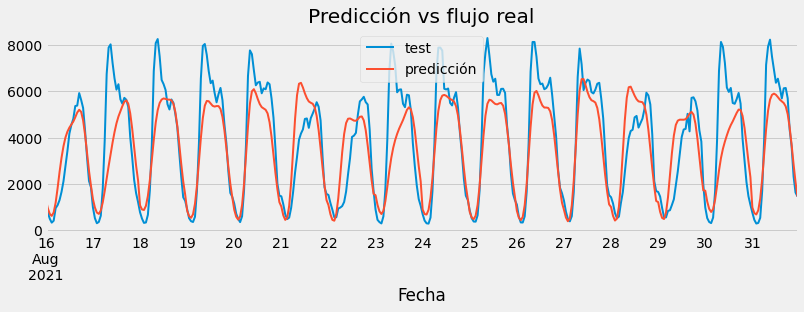

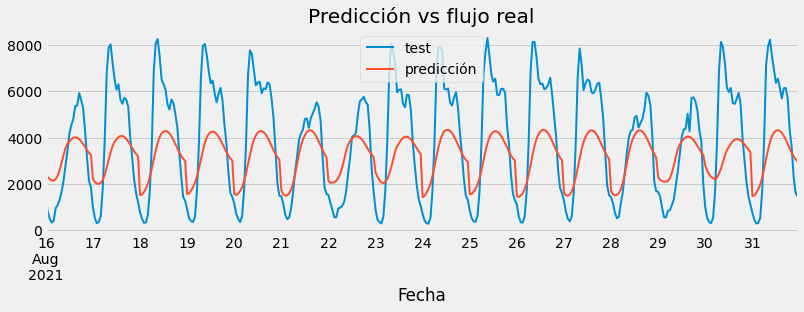

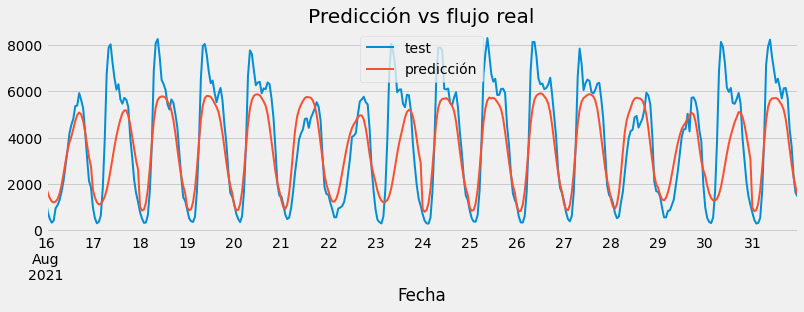

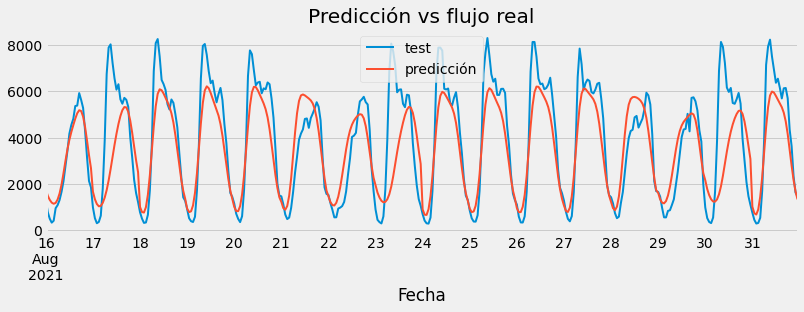

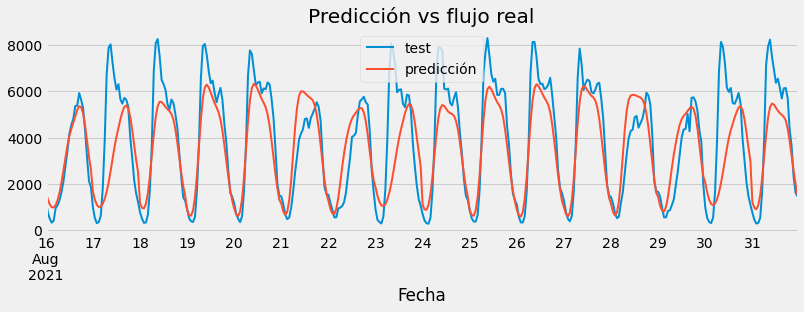

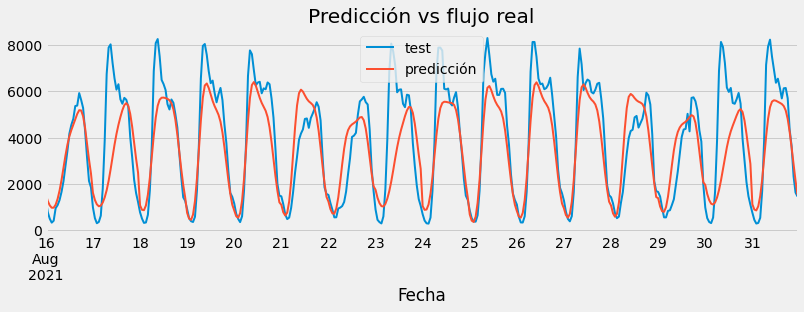

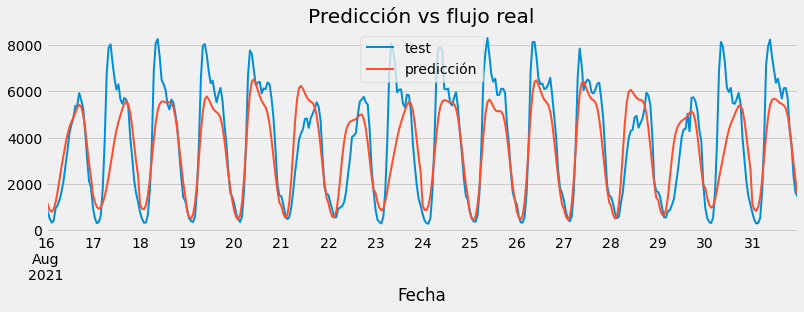

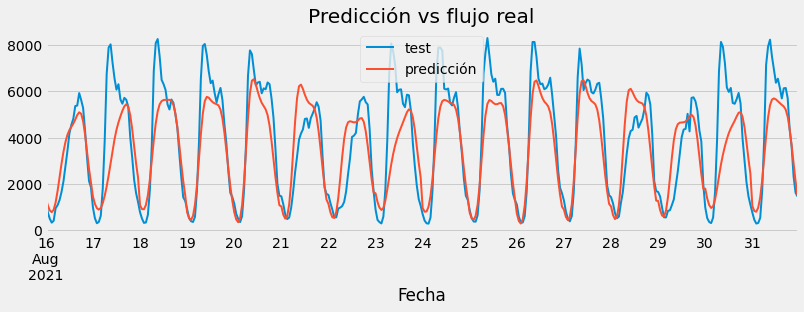

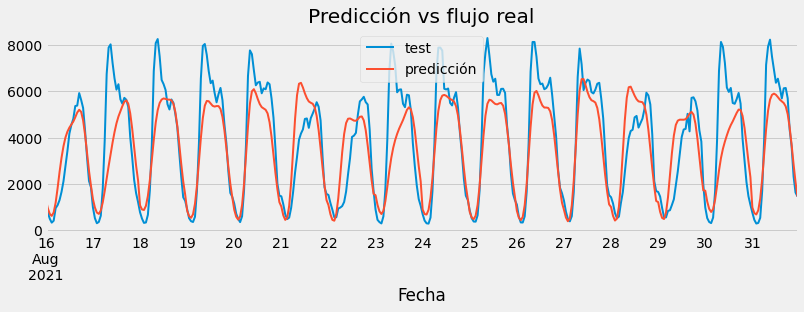

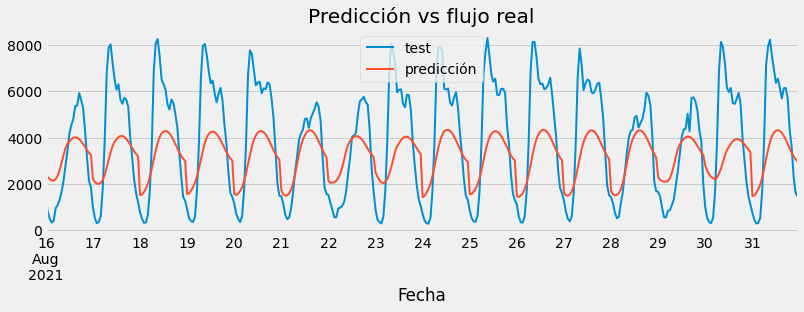

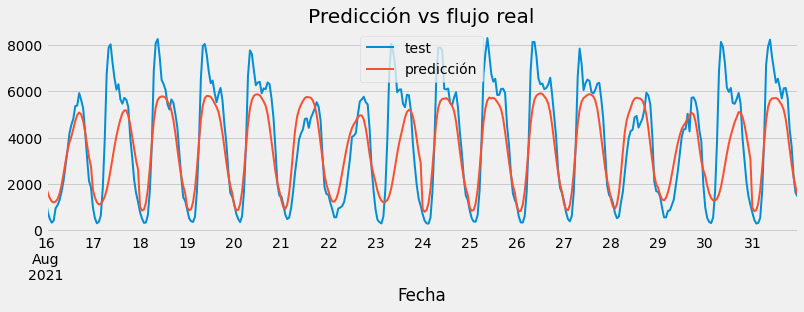

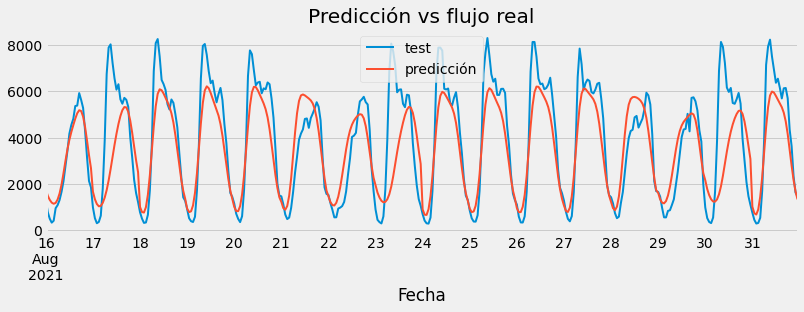

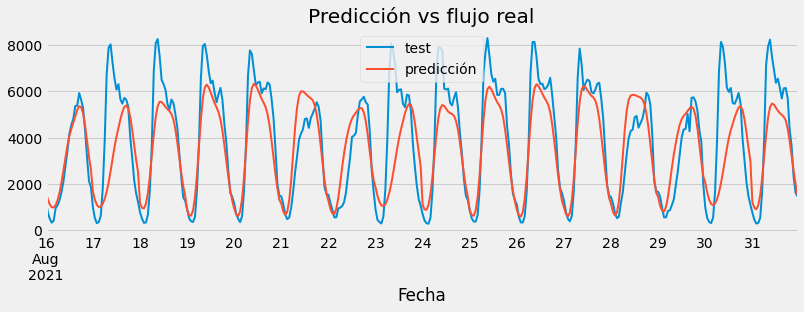

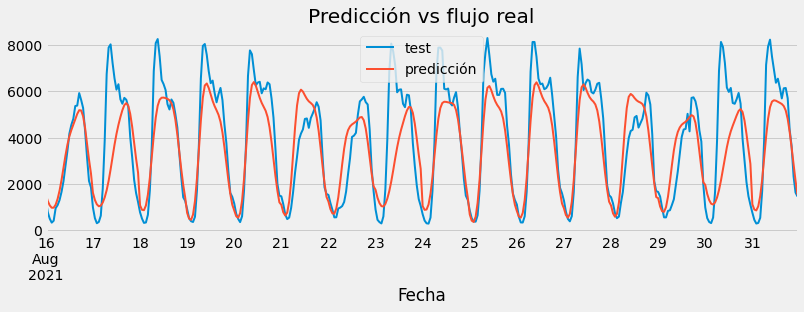

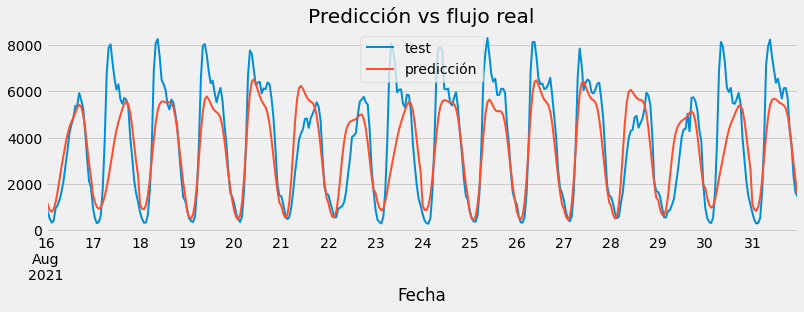

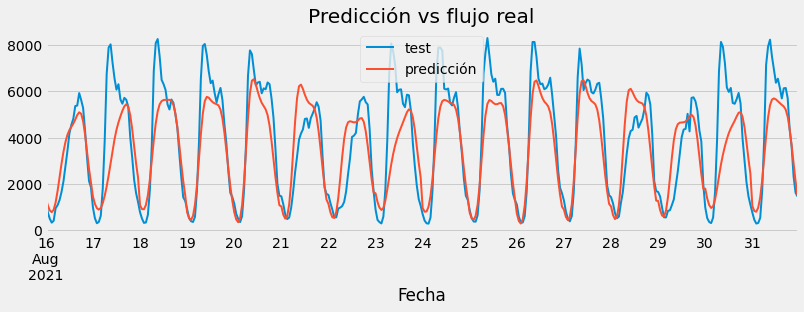

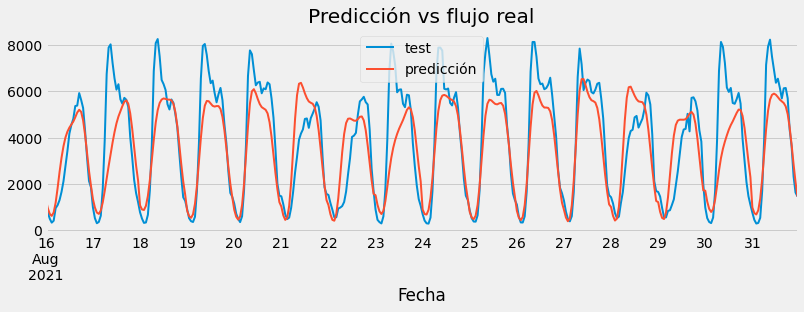

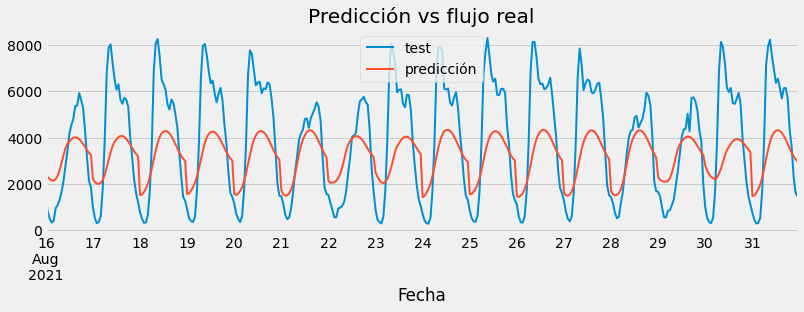

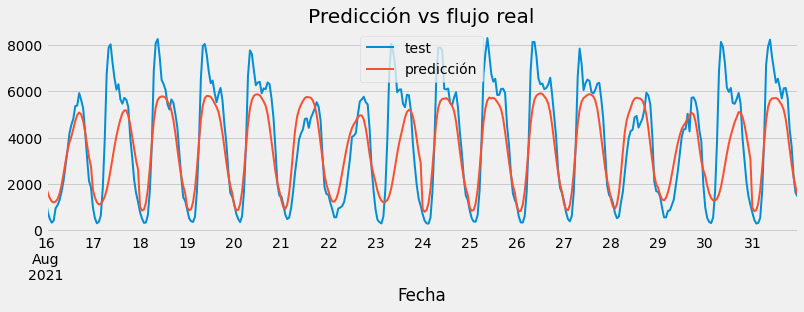

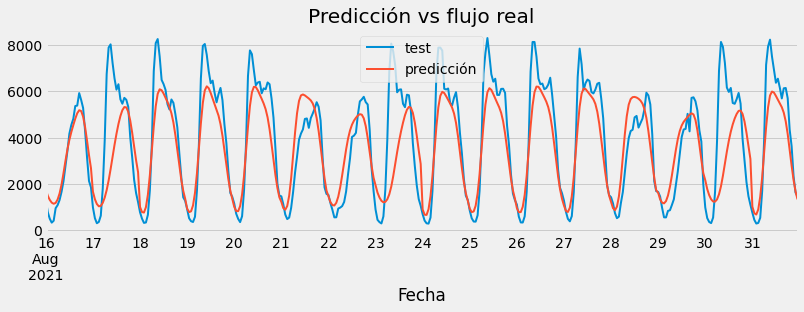

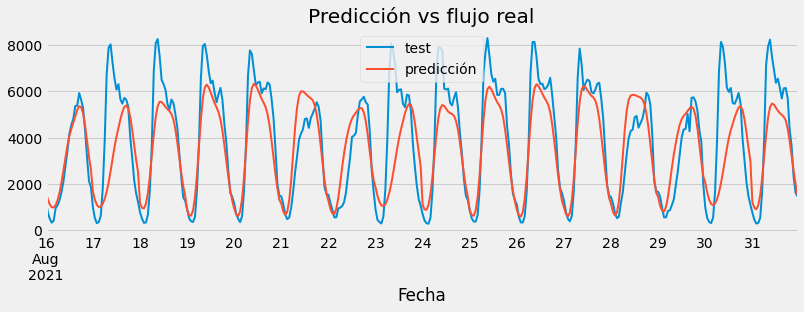

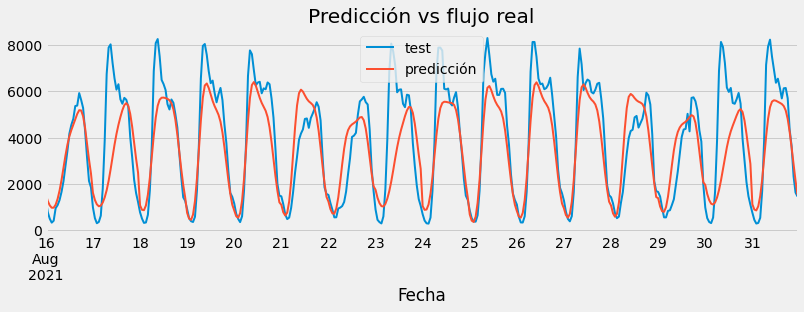

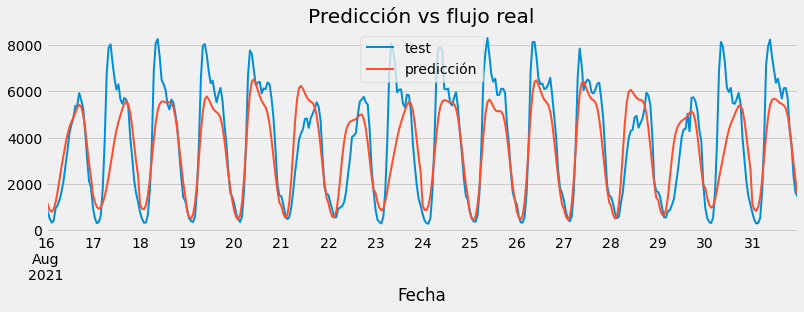

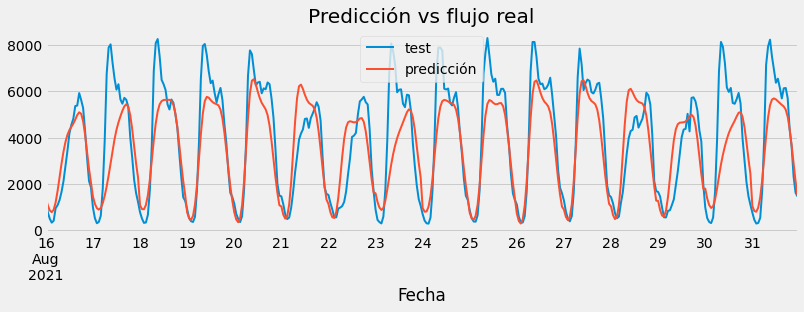

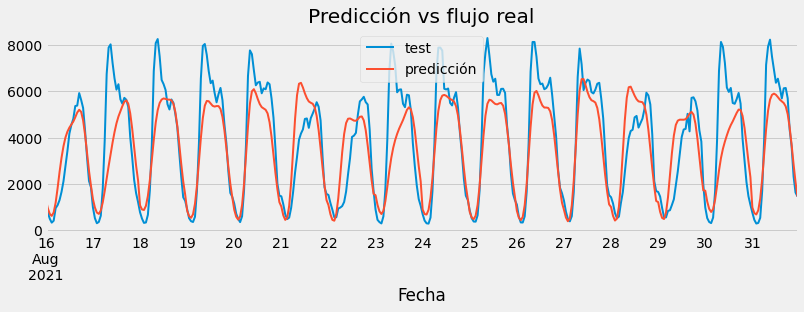

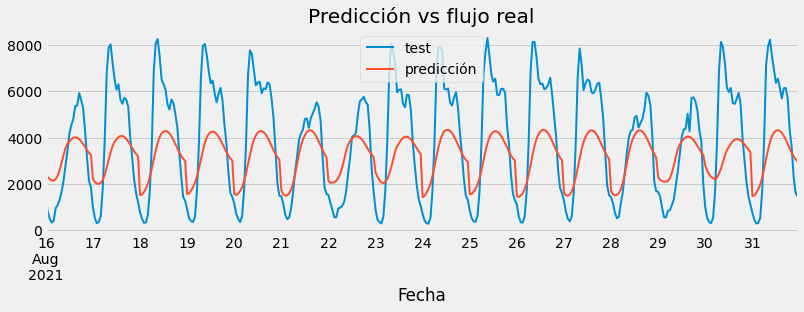

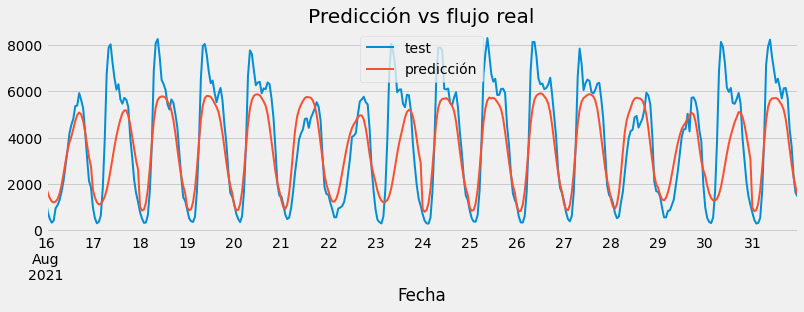

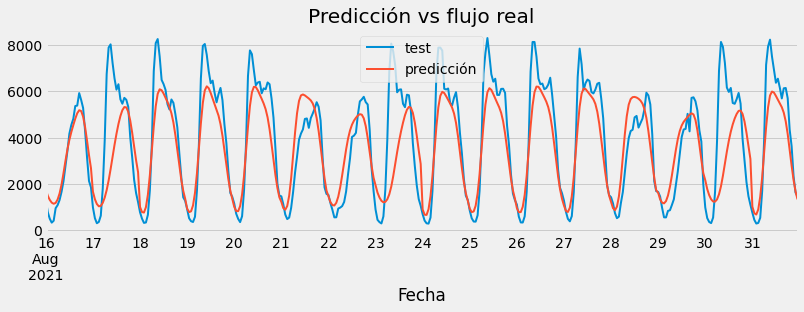

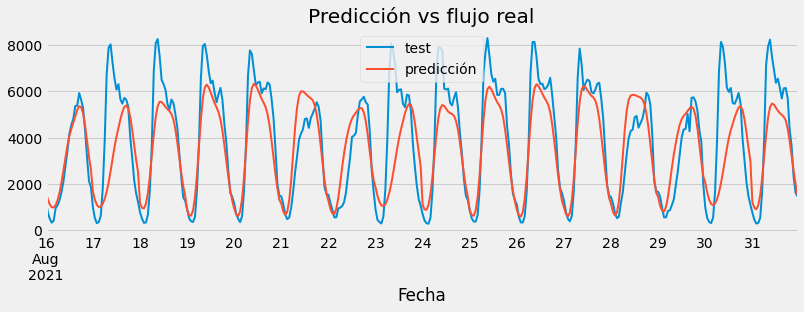

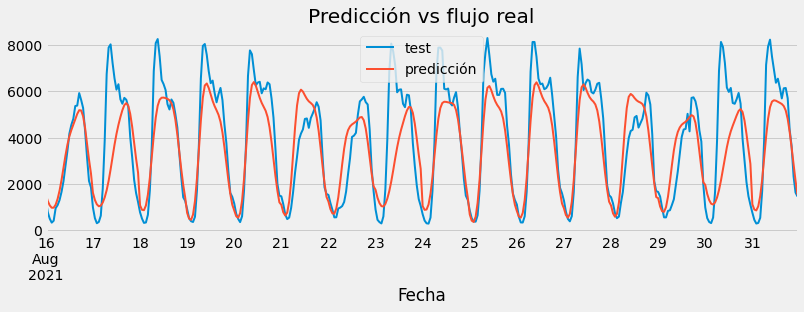

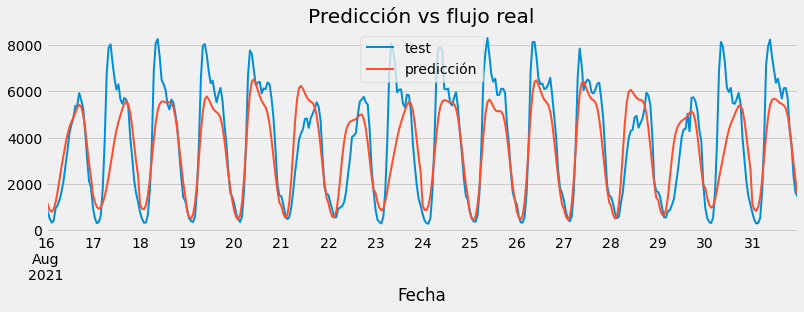

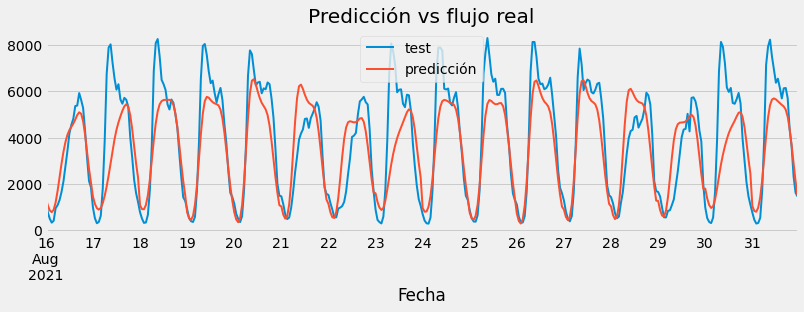

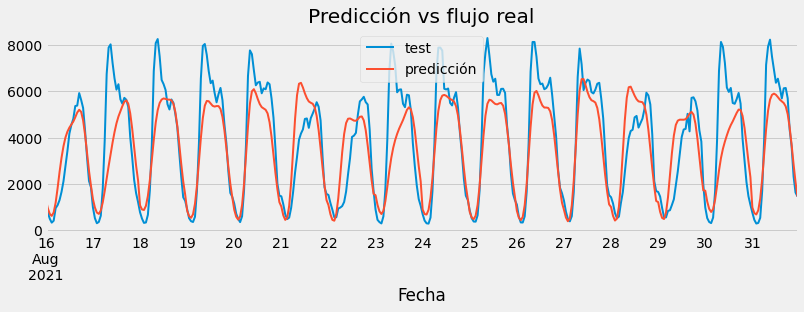

In [27]:
mlflow.set_experiment("Forecasting_Trafico")

logs = []

for alpha  in param_grid[0]: #Búsqueda del peso de las clases 
    for lag in lags_grid:
        
        with mlflow.start_run():
            mlflow.log_param("alpha", alpha)
            mlflow.log_param("lag", lag)

            #--------------------------------------------------------------------------------
            #definir modelos con los parámetros
            #--------------------------------------------------------------------------------<definir modelo>
            forecaster = ForecasterAutoreg(
                    regressor = Ridge(normalize=True),
                    lags      = lag # Este valor será remplazado en el grid search
            )

            #------------------------------------------------------------------------------
            #Entrenar el modelo
            #--------------------------------------------------------------------------------<entrenar modelo>
            forecaster.fit(y=df.loc[:fin_validacion, target])
            mlflow.log_param("forecaster_params", forecaster)
            


            print("alpha: ",alpha)
            print("lag: ", lag)

            #--------------------------------------------------------------------
            # Back Test
            # --------------------------------------------------------------------<Back Test>
            #steps = 336
            #predicciones = forecaster_rf.predict(steps=steps)
            
            metrica, predicciones = backtesting_forecaster(
                            forecaster = forecaster,
                            y          = df[target],
                            initial_train_size = len(df.loc[:fin_validacion]),
                            steps      = 24,
                            metric     = 'mean_absolute_error',
                            verbose    = True
                        )


            #--------------------------------------------------------------------
            # Error
            # --------------------------------------------------------------------<Error>
            print(f'Error backtest: {metrica}')
            mlflow.log_metric("Error backtest", metrica[0])
                
                
                
            #--------------------------------------------------------------------
            # Creación de gráficas
            # --------------------------------------------------------------------<Gráficas>
    
            # Se añade el índice temporal a las predicciones
            predicciones = pd.Series(data=predicciones, index=datos_test.index)

            fig, ax = plt.subplots(figsize=(12, 3.5))
            df.loc[predicciones.index, 'Num_vehiculos_hora'].plot(ax=ax, linewidth=2, label='test')
            predicciones.plot(linewidth=2, label='predicción', ax=ax)
            ax.set_title('Predicción vs flujo real')
            ax.legend();
            
            plt.savefig("flujo_.png")
            mlflow.log_artifact("flujo_.png")
            
            #---------------------------------------------------------------------------------


            #Almacenar en un sólo objeto el modelo , el test ....
            log = [forecaster, datos_train, datos_val,datos_test, predicciones]
            #Agregar a la lista
            logs.append(log)

            #Almacenar del modelo con el peso de clases  y el fold correspondiente

            #mlflow.pyfunc.log_model("ridge_model_forecasting", python_model=forecaster)
                


            mlflow.end_run()

    print("\nAverages::::::::::::::::::::::::::::::::::::::::::::::::::::::::::. ")

    print("Best::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::. ")

    print("\n\n\n\n\n")

Podemos ver los resultados de MLFlow si ejecutamos en la terminal:



 _mlflow ui -p 1234_
 
 
 _mlflow ui --host 0.0.0.0 -p 1234_
 

### Importancia predictores

In [28]:
# Importancia predictores
# ==============================================================================
impotancia = forecaster.get_coef()
dict(zip(forecaster.lags, impotancia))

{1: 0.18404705173253283,
 2: 0.11925615448473512,
 3: 0.0664997266837322,
 4: 0.03423628881963288,
 5: 0.01858985042051204,
 6: 0.010490902302299467,
 7: 0.003899496479364202,
 8: -0.0018026280943048503,
 9: -0.008520419607756435,
 10: -0.01598447017663645,
 11: -0.023074554536616377,
 12: -0.024693764857636632,
 13: -0.016927727841291623,
 14: -0.005180837925514602,
 15: 0.003497936322955053,
 16: 0.007345537244317705,
 17: 0.007381440672638004,
 18: 0.007299166124167488,
 19: 0.008278807518370051,
 20: 0.0138004295435374,
 21: 0.028495387578668183,
 22: 0.05108752210530499,
 23: 0.07375465633092837,
 24: 0.08028515962743982,
 25: 0.05759023837891021,
 26: 0.024524411941884587,
 27: -0.0003162668922601858,
 28: -0.010441118903151844,
 29: -0.009638851965944033,
 30: -0.005797508448011188,
 31: -0.0032759766250819006,
 32: -0.0013504405075792896,
 33: -0.0005051076142160729,
 34: -0.0005687396457066012,
 35: -0.0027163735417684715,
 36: -0.00528027787984191,
 37: -0.00592386214551875,
